In [1]:
import torch
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import tensorflow as tf
import torch.optim as optim

In [2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [3]:
def model(t_u, w2, w1, b):
    return w2 * t_u**2 + w1 * t_u + b

In [4]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [5]:
w2 = torch.ones(())
w1 = torch.ones(())
b = torch.zeros(())
t_p = model(t_u, w2, w1, b)
t_p

tensor([1310.1901, 3180.7100, 3445.4399, 6789.5103, 3225.9900, 2440.1101,
        1183.1101,  497.0399, 2390.9600, 3708.5601, 4746.9600])

In [6]:
loss = loss_fn(t_p, t_c)
loss

tensor(11709471.)

In [7]:
delta = 0.1
loss_rate_of_change_w2 = (loss_fn(model(t_u, w2 + delta, w1, b), t_c) - loss_fn(model(t_u, w2 - delta, w1, b), t_c)) / (2.0 * delta)

In [8]:
learning_rate = 1e-2
w2 = w2 - learning_rate * loss_rate_of_change_w2

In [9]:
loss_rate_of_change_w1 = (loss_fn(model(t_u, w2, w1 + delta, b), t_c) - loss_fn(model(t_u, w2, w1 - delta, b), t_c)) / (2.0 * delta)
w1 = w1 - learning_rate * loss_rate_of_change_w1

In [10]:
loss_rate_of_change_b = (loss_fn(model(t_u, w2, w1, b + delta), t_c) - loss_fn(model(t_u, w2, w1, b - delta), t_c)) / (2.0 * delta)
b = b - learning_rate * loss_rate_of_change_b

In [11]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

In [12]:
def dmodel_dw2(t_u, w2, w1, b):
    return t_u

In [13]:
def dmodel_dw1(t_u, w2, w1, b):
    return t_u

In [14]:
def dmodel_db(t_u, w2, w1, b):
    return 1.0

In [15]:
def grad_fn(t_u, t_c, t_p, w2, w1, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw2 = dloss_dtp * dmodel_dw2(t_u, w2, w1, b)
    dloss_dw1 = dloss_dtp * dmodel_dw1(t_u, w2, w1, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w2, w1, b)
    return torch.stack([dloss_dw2.sum(), dloss_dw1.sum(), dloss_db.sum()])

In [16]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w2, w1, b = params
        
        t_p = model(t_u, w2, w1, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w2, w1, b)
        
        params = params - learning_rate * grad
        
        if epoch <= 1 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss {loss.item():.4f},")
        
    return params

In [17]:
t_un = 0.1 * t_u

In [18]:
params = training_loop(
n_epochs = 5000,
learning_rate = 1e-1,
params = torch.tensor([1.0, 1.0, 0.0]),
t_u = t_un,
t_c = t_c,)
print(params)

Epoch 1, Loss 675.7944,
Epoch 500, Loss nan,
Epoch 1000, Loss nan,
Epoch 1500, Loss nan,
Epoch 2000, Loss nan,
Epoch 2500, Loss nan,
Epoch 3000, Loss nan,
Epoch 3500, Loss nan,
Epoch 4000, Loss nan,
Epoch 4500, Loss nan,
Epoch 5000, Loss nan,
tensor([nan, nan, nan])


In [19]:
params = training_loop(
n_epochs = 5000,
learning_rate = 1e-2,
params = torch.tensor([1.0, 1.0, 0.0]),
t_u = t_un,
t_c = t_c,)
print(params)

Epoch 1, Loss 675.7944,
Epoch 500, Loss nan,
Epoch 1000, Loss nan,
Epoch 1500, Loss nan,
Epoch 2000, Loss nan,
Epoch 2500, Loss nan,
Epoch 3000, Loss nan,
Epoch 3500, Loss nan,
Epoch 4000, Loss nan,
Epoch 4500, Loss nan,
Epoch 5000, Loss nan,
tensor([nan, nan, nan])


In [20]:
params = training_loop(
n_epochs = 5000,
learning_rate = 1e-4,
params = torch.tensor([1.0, 1.0, 0.0]),
t_u = t_un,
t_c = t_c,)
print(params)

Epoch 1, Loss 675.7944,
Epoch 500, Loss 9.6786,
Epoch 1000, Loss 9.4744,
Epoch 1500, Loss 9.2759,
Epoch 2000, Loss 9.0830,
Epoch 2500, Loss 8.8954,
Epoch 3000, Loss 8.7130,
Epoch 3500, Loss 8.5358,
Epoch 4000, Loss 8.3634,
Epoch 4500, Loss 8.1959,
Epoch 5000, Loss 8.0330,
tensor([ 0.3497,  0.3497, -0.8786])


In [21]:
params = training_loop(
n_epochs = 5000,
learning_rate = 1e-3,
params = torch.tensor([1.0, 1.0, 0.0]),
t_u = t_un,
t_c = t_c,)
print(params)

Epoch 1, Loss 675.7944,
Epoch 500, Loss 8.0357,
Epoch 1000, Loss 6.6364,
Epoch 1500, Loss 5.5829,
Epoch 2000, Loss 4.7906,
Epoch 2500, Loss 4.1956,
Epoch 3000, Loss 3.7494,
Epoch 3500, Loss 3.4154,
Epoch 4000, Loss 3.1660,
Epoch 4500, Loss 2.9802,
Epoch 5000, Loss 2.8421,
tensor([ 0.4414,  0.4414, -4.5622])


In [22]:
def modlin(t_u, w, blin):
    return w * t_u + blin

In [23]:
w = torch.ones(())
blin = torch.zeros(())
t_plin = modlin(t_u, w, blin)
t_plin

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [24]:
loss = loss_fn(t_plin, t_c)
loss

tensor(1763.8848)

In [25]:
loss_rate_of_change_w = (loss_fn(modlin(t_u, w, blin), t_c) - loss_fn(modlin(t_u, w - delta, blin), t_c)) / (2.0 * delta)
w = w - learning_rate * loss_rate_of_change_w

In [26]:
loss_rate_of_change_blin = (loss_fn(modlin(t_u, w, blin + delta), t_c) - loss_fn(modlin(t_u, w2, blin - delta), t_c)) / (2.0 * delta)
blin = blin - learning_rate * loss_rate_of_change_blin

In [27]:
def dloss_fn(t_plin, t_c):
    dsq_diffs = 2 * (t_plin - t_c) / t_plin.size(0)
    return dsq_diffs

In [28]:
def dmodel_dw(t_u, w, blin):
    return t_u

In [29]:
def dmodel_dblin(t_u, w, blin):
    return 1.0

In [30]:
def grad_fnlin(t_u, t_c, t_plin, w, blin):
    dloss_dtp = dloss_fn(t_plin, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, blin)
    dloss_dblin = dloss_dtp * dmodel_dblin(t_u, w, blin)
    return torch.stack([dloss_dw.sum(), dloss_dblin.sum()])

In [31]:
def training_looplin(n_epochs, learning_rate, paramslin, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, blin = paramslin
        
        t_plin = modlin(t_u, w, blin)
        loss = loss_fn(t_plin, t_c)
        grad = grad_fnlin(t_u, t_c, t_plin, w, blin)
        
        paramslin = paramslin - learning_rate * grad
        
        if epoch <= 1 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss {loss.item():.4f},")
        
    return paramslin

In [32]:
paramslin = training_looplin(
n_epochs = 5000,
learning_rate = 1e-2,
paramslin = torch.tensor([1.0, 0.0]),
t_u = t_un,
t_c = t_c,)
print(paramslin)

Epoch 1, Loss 80.3643,
Epoch 500, Loss 7.8601,
Epoch 1000, Loss 3.8285,
Epoch 1500, Loss 3.0922,
Epoch 2000, Loss 2.9577,
Epoch 2500, Loss 2.9331,
Epoch 3000, Loss 2.9286,
Epoch 3500, Loss 2.9278,
Epoch 4000, Loss 2.9277,
Epoch 4500, Loss 2.9277,
Epoch 5000, Loss 2.9276,
tensor([  5.3671, -17.3012])


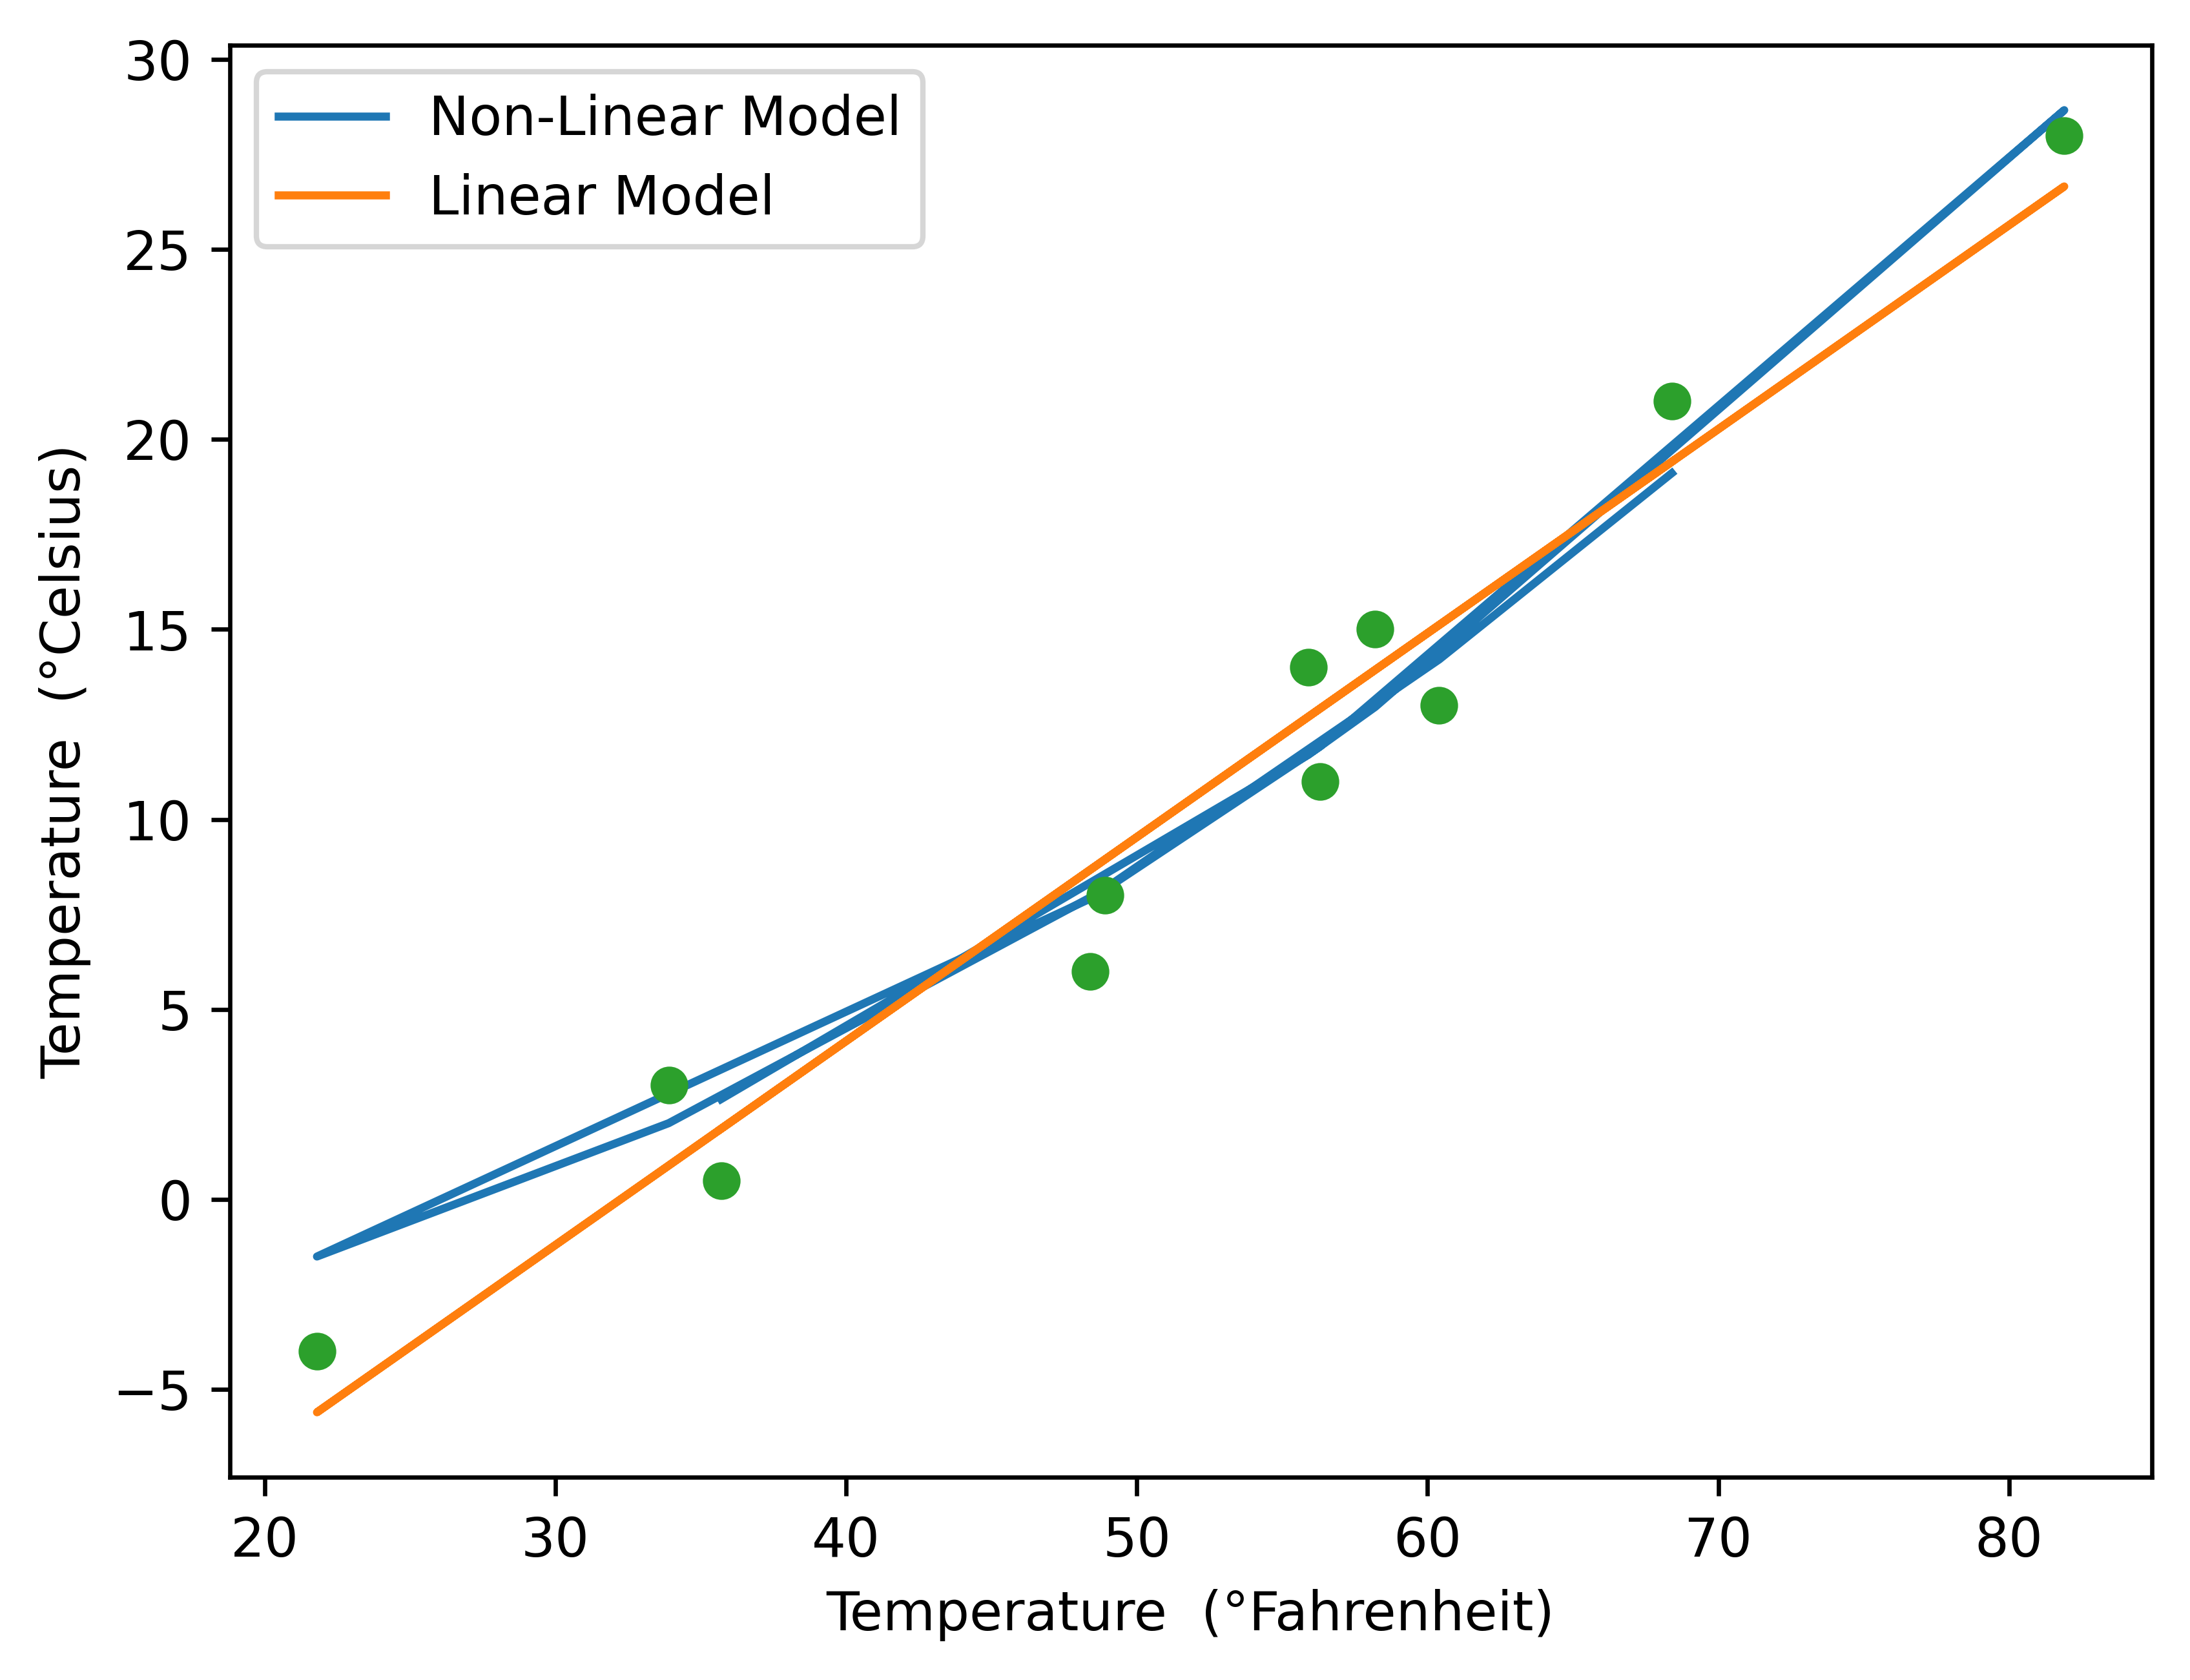

In [33]:
t_p = model(t_un, *params)
t_plin = modlin(t_un, *paramslin)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature  (°Fahrenheit)")
plt.ylabel("Temperature  (°Celsius)")
nonlin = plt.plot(t_u.numpy(), t_p.detach().numpy())
lin = plt.plot(t_u.numpy(), t_plin.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.legend(['Non-Linear Model', 'Linear Model'])

In [34]:
df = pd.read_csv (r'C:\Users\homer\OneDrive\Documents\School Folder\Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [35]:
hdata = df.iloc[:,[0, 1, 2, 3, 4, 10]].values
hdata

array([[13300000,     7420,        4,        2,        3,        2],
       [12250000,     8960,        4,        4,        4,        3],
       [12250000,     9960,        3,        2,        2,        2],
       ...,
       [ 1750000,     3620,        2,        1,        1,        0],
       [ 1750000,     2910,        3,        1,        1,        0],
       [ 1750000,     3850,        3,        1,        2,        0]],
      dtype=int64)

In [36]:
x1 = hdata[:,1]
x1 = torch.tensor(x1)
x2 = hdata[:,2]
x2 = torch.tensor(x2)
x3 = hdata[:,3]
x3 = torch.tensor(x3)
x4 = hdata[:,4]
x4 = torch.tensor(x4)
x5 = hdata[:,5]
x5 = torch.tensor(x5)
U =  hdata[:, 0]
U = torch.tensor(U)

In [37]:
w5 = torch.ones(())
w4 = torch.ones(())
w3 = torch.ones(())
w2 = torch.ones(())
w1 = torch.ones(())
b = torch.zeros(())

In [38]:
def Q2model(x1, x2, x3, x4, x5, w5, w4, w3, w2, w1, b):
    return x1*w1+x2*w2+x3*w3+x4*w4+x5*w5+b 

In [39]:
def Q2loss_fn(X, U):
    squared_diffs = (X - U)**2
    return squared_diffs.mean()

In [40]:
n_samples = x1.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([239,   5, 153, 267, 141, 403, 167,  41, 223, 190, 458,  86, 262, 514,
         111,  91, 249, 186, 158, 286, 134, 234, 312, 152,  42, 530, 315, 440,
         404, 497, 511, 177,  64, 205, 145, 207, 425,  29, 269, 361, 108, 161,
         540, 473, 409,  60, 352, 372, 256, 439, 303, 311, 363, 220, 164, 381,
         411, 380, 274, 391, 243, 456,  39, 299, 392, 423,  23, 170, 360,  78,
         499, 308, 121, 326, 525, 198, 422, 327, 419, 441, 271, 373, 493,  72,
          16,  30, 187,  49, 479, 454, 106,  74, 125,  70, 179, 507,  20, 501,
         231, 430,   6,   9,   4, 526,  37, 122, 163, 165, 343,  35, 523,  17,
          22, 233,  18,  76, 334, 202, 244, 101, 492,  36, 486, 270, 238, 344,
         287, 398, 351,  73,  67,  15,  55, 284, 281,  31, 388, 159, 364, 305,
         109, 513, 357, 362, 255, 182, 126, 506, 192, 476,  93, 448, 129, 472,
         494, 166, 174, 139, 254, 247, 490, 532, 541, 115, 325, 136, 266,  27,
         536, 149, 462, 515, 531, 131, 453, 396,  59

In [41]:
train_x1 = x1[train_indices]
train_x2 = x2[train_indices]
train_x3 = x3[train_indices]
train_x4 = x4[train_indices]
train_x5 = x5[train_indices]
train_U = U[train_indices]
val_x1 = x1[val_indices]
val_x2 = x2[val_indices]
val_x3 = x3[val_indices]
val_x4 = x4[val_indices]
val_x5 = x5[val_indices]
val_U = U[val_indices]

train_x1_un= (train_x1 - min(train_x1))/(max(train_x1)-min(train_x1))
train_x2_un= (train_x2- min(train_x2))/(max(train_x2)-min(train_x2))
train_x3_un = (train_x3 - min(train_x3))/(max(train_x3)-min(train_x3))
train_x4_un = (train_x4 - min(train_x4))/(max(train_x4)-min(train_x4))
train_x5_un = (train_x5 - min(train_x5))/(max(train_x5)-min(train_x5))
val_x1_un = (val_x1 - min(val_x1))/(max(val_x1)-min(val_x1))
val_x2_un = (val_x2 - min(val_x2))/(max(val_x2)-min(val_x2))
val_x3_un = (val_x3 - min(val_x3))/(max(val_x3)-min(val_x3))
val_x4_un = (val_x4 - min(val_x4))/(max(val_x4)-min(val_x4))
val_x5_un = (val_x5 - min(val_x5))/(max(val_x5)-min(val_x5))

In [97]:
def Q2training_loop (n_epochs, optimizer, params, x1t, x2t, x3t, x4t, x5t, x1v, x2v, x3v, x4v, x5v, Ut, Uv):

    for epoch in range(1, n_epochs + 1):
        X = Q2model(x1t, x2t, x3t, x4t, x5t, *params)
        train_loss = Q2loss_fn(X, Ut)
        
        X = Q2model(x1v, x2v, x3v, x4v, x5v, *params)
        val_loss = Q2loss_fn(X, Uv)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Train loss {train_loss.item():.4f},"f" Val loss {val_loss.item():.4f}")
            
    return params

In [98]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.SGD([params], lr=learning_rate)

Q2training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    x1t = train_x1_un,
    x2t = train_x2_un,
    x3t = train_x3_un,
    x4t = train_x4_un,
    x5t = train_x5_un,
    x1v = val_x1_un,
    x2v = val_x2_un,
    x3v = val_x3_un,
    x4v = val_x4_un,
    x5v = val_x5_un,
    Ut = train_U,
    Uv = val_U)

Epoch 500, Train loss 1473551532032.0000, Val loss 1841647190016.0000
Epoch 1000, Train loss 1467983724544.0000, Val loss 1839918743552.0000
Epoch 1500, Train loss 1467851341824.0000, Val loss 1841001529344.0000
Epoch 2000, Train loss 1467848196096.0000, Val loss 1841225269248.0000
Epoch 2500, Train loss 1467848065024.0000, Val loss 1841262624768.0000
Epoch 3000, Train loss 1467848065024.0000, Val loss 1841268785152.0000
Epoch 3500, Train loss 1467848065024.0000, Val loss 1841268785152.0000
Epoch 4000, Train loss 1467848065024.0000, Val loss 1841268785152.0000
Epoch 4500, Train loss 1467848065024.0000, Val loss 1841268785152.0000
Epoch 5000, Train loss 1467848065024.0000, Val loss 1841268785152.0000


tensor([1095343.1250, 1547447.0000, 2279002.5000,  590404.0625, 4561744.5000,
        2503065.7500], requires_grad=True)

In [78]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

Q2training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    x1t = train_x1_un,
    x2t = train_x2_un,
    x3t = train_x3_un,
    x4t = train_x4_un,
    x5t = train_x5_un,
    x1v = val_x1_un,
    x2v = val_x2_un,
    x3v = val_x3_un,
    x4v = val_x4_un,
    x5v = val_x5_un,
    Ut = train_U,
    Uv = val_U)

Epoch 500, Train loss 1717617033216.0000, Val loss 2232657641472.0000
Epoch 1000, Train loss 1602637266944.0000, Val loss 2038945021952.0000
Epoch 1500, Train loss 1552111239168.0000, Val loss 1953006223360.0000
Epoch 2000, Train loss 1523586564096.0000, Val loss 1907470893056.0000
Epoch 2500, Train loss 1505513832448.0000, Val loss 1880921866240.0000
Epoch 3000, Train loss 1493528739840.0000, Val loss 1864673787904.0000
Epoch 3500, Train loss 1485431373824.0000, Val loss 1854504304640.0000
Epoch 4000, Train loss 1479914422272.0000, Val loss 1848102092800.0000
Epoch 4500, Train loss 1476139024384.0000, Val loss 1844100595712.0000
Epoch 5000, Train loss 1473549172736.0000, Val loss 1841651515392.0000


tensor([1209695.1250, 1523563.0000, 2299853.0000,  694291.3750, 4038561.2500,
        2583042.5000], requires_grad=True)

In [79]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-3
optimizer = optim.SGD([params], lr=learning_rate)

Q2training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    x1t = train_x1_un,
    x2t = train_x2_un,
    x3t = train_x3_un,
    x4t = train_x4_un,
    x5t = train_x5_un,
    x1v = val_x1_un,
    x2v = val_x2_un,
    x3v = val_x3_un,
    x4v = val_x4_un,
    x5v = val_x5_un,
    Ut = train_U,
    Uv = val_U)

Epoch 500, Train loss 3849033089024.0000, Val loss 4818354044928.0000
Epoch 1000, Train loss 2114297397248.0000, Val loss 2775082336256.0000
Epoch 1500, Train loss 1934560722944.0000, Val loss 2559016697856.0000
Epoch 2000, Train loss 1882137165824.0000, Val loss 2488213176320.0000
Epoch 2500, Train loss 1844539817984.0000, Val loss 2432831586304.0000
Epoch 3000, Train loss 1812262813696.0000, Val loss 2383437365248.0000
Epoch 3500, Train loss 1783960829952.0000, Val loss 2339183788032.0000
Epoch 4000, Train loss 1759020580864.0000, Val loss 2299588247552.0000
Epoch 4500, Train loss 1736961818624.0000, Val loss 2264126193664.0000
Epoch 5000, Train loss 1717381103616.0000, Val loss 2232294309888.0000


tensor([1328414.2500, 1409572.2500, 1422881.1250, 1068721.1250, 1641955.6250,
        3223196.5000], requires_grad=True)

In [80]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-4
optimizer = optim.SGD([params], lr=learning_rate)

Q2training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    x1t = train_x1_un,
    x2t = train_x2_un,
    x3t = train_x3_un,
    x4t = train_x4_un,
    x5t = train_x5_un,
    x1v = val_x1_un,
    x2v = val_x2_un,
    x3v = val_x3_un,
    x4v = val_x4_un,
    x5v = val_x5_un,
    Ut = train_U,
    Uv = val_U)

Epoch 500, Train loss 20058470350848.0000, Val loss 23893112782848.0000
Epoch 1000, Train loss 16012428705792.0000, Val loss 19134075109376.0000
Epoch 1500, Train loss 12874264084480.0000, Val loss 15442082004992.0000
Epoch 2000, Train loss 10439949811712.0000, Val loss 12577555873792.0000
Epoch 2500, Train loss 8551329169408.0000, Val loss 10354727845888.0000
Epoch 3000, Train loss 7085795311616.0000, Val loss 8629547696128.0000
Epoch 3500, Train loss 5948269658112.0000, Val loss 7290289651712.0000
Epoch 4000, Train loss 5065064579072.0000, Val loss 6250321936384.0000
Epoch 4500, Train loss 4379042119680.0000, Val loss 5442462285824.0000
Epoch 5000, Train loss 3845904138240.0000, Val loss 4814602240000.0000


tensor([ 726518.2500,  823716.5000,  523410.4375,  715067.5000,  756977.3125,
        2627771.2500], requires_grad=True)